In [2]:
import pandas as pd
import numpy as np

# Section 13: Data Formats and I/O

In this course thus far, we have read in all of our data in the CSV format. CSV is an excellent, organized way to read in data for use in Pandas. But it is not the only way, and there are multiple other options for reading in and outputting data. In fact, it would be a great idea to become familiar with these other formats as they are likely to be encountered by data analysts.

In this section we'll cover reading and writing the following:
* HTML
* JSON
* Excel
* Pickle

We'll also survey other data formats that Pandas supports.

## Reading JSON

**JSON**, or *Javascript Object Notation*, is a text-based interchange format that is widely used to communicate information between different applications that communicate over the internet. Many APIs use JSON to serve data.

JSON borrows heavily from JavaScript, but it is a standalone format that is supported by many languages including python.

* https://en.wikipedia.org/wiki/JSON

Let's take a look at an example at the following link: https://www.andybek.com/pandas-folks-json

This link takes us to a JSON object: 





```
{
  "name": ["Brian Dogood", "Leah Bokeh", "Mark Prescott", "Jurgen Gupta"],
  "salary": [64000, 73200, 76400, 94300],
  "occupation": [
    "Software Technician",
    "Data Scientist",
    "Business Consultant",
    "Aerospace Engineer"
  ]
}
```





This object is wrapped in curly braces, reminding us of Python dictionaries or JavaScript objects. And within those braces we have a series of key:value pairs describing the contents. In this case, we have names of individuals, their salaries, and their occupations. They are listed in respective order (*ordered lists*) within separate key:value pairs.

How do we read this into Pandas? Not surprisingly, it's not much different from reading CSVs. We simply call the `pd.read_json()` method!
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html


In [4]:
pd.read_json('https://www.andybek.com/pandas-folks-json')

,name,salary,occupation
0,Brian Dogood,64000,Software Technician
1,Leah Bokeh,73200,Data Scientist
2,Mark Prescott,76400,Business Consultant
3,Jurgen Gupta,94300,Aerospace Engineer


And voila, we have a dataframe! By now this should be incredibly familiar to us. Notice that each of the keys within the JSON is a column name, and the values are the data within each column. At this point, the format of the data that we read in is not longer important because we are now in Pandas.

Let's assign to a variable.

In [5]:
folks = pd.read_json('https://www.andybek.com/pandas-folks-json')

In [6]:
type(folks)

pandas.core.frame.DataFrame

In [7]:
folks.iloc[2]

name                Mark Prescott
salary                      76400
occupation    Business Consultant
Name: 2, dtype: object

## Reading HTML

HTML, or Hypertext Markup Language, is ubiquitous on the internet and is found everywhere on the web. HTML is the main markup language for web sites, which works alongside CSS, JS, and other backend services to present you with the websites that you visit.

* https://developer.mozilla.org/en-US/docs/Web/HTML

Much of the information on the web is available in the form of HTML tables, which contain information that you might be interested in reading in via Pandas.

Suppose we want to put together a dataframe of European countries and their populations. How would we do this?

Well, first we need to find a data source. As it happens, there's a Wikipedia article that shows all European countries with the data we want.
* https://en.wikipedia.org/wiki/List_of_European_countries_by_population

How do we read this into Pandas? It turns out that Pandas has the ability to read in data from HTML tables directly from a webpage. It recognizes HTML **table** classes. It uses the method `pd.read_html()`.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html



In [8]:
countries = pd.read_html('https://en.wikipedia.org/wiki/List_of_European_countries_by_population')

Now we can treat it like a dataframe, right? Not so fast - what returns is not a dataframe, but instead a list of dataframes. Remember that you passed in an entire webpage to the `pd.read_html()` method, and so if the method encounters multiple tables to read, it needs a place to store those tables in an organized fashion. It uses a list for this task.

In [10]:
## Results in AttributeError: 'list' object has no attribute 'head'
# countries.head()

So now that we know we have a list of data frames, let's explore it a bit.

In [12]:
len(countries)

2

The `countries` variable is a list of two dataframes. The reason is that the webpage that we sent the method to actually has two tables - the table we're interested in, and a table of links to other webpages of interest.

So let's select the first dataframe from that list, as that's what we want.

In [13]:
countries[0]

Country.mw-parser-output .nobold{font-weight:normal}(or territory)  ...                             Source
   Country.mw-parser-output .nobold{font-weight:normal}(or territory)  ...                             Source
0                                   Russia * [Note 1]                  ...        National annual estimate[7]
1                                            Turkey *                  ...        National annual estimate[8]
2                                           Germany *                  ...     National quarterly estimate[9]
3                                   France * [Note 2]                  ...      National monthly estimate[10]
4                           United Kingdom * [Note 3]                  ...       National annual estimate[11]
5                                             Italy *                  ...      National monthly estimate[12]
6                                             Spain *                  ...              National estimate[13]
7                                  Ukraine * [Note 4]                  ...      National monthly estimate[14]
8                                            Poland *                  ...      National monthly estimate[15]
9                                           Romania *                  ...       National annual estimate[16]
10                                       Kazakhstan *                  ...              National estimate[17]
11                                      Netherlands *                  ...      National population clock[18]
12                                          Belgium *                  ...              National estimate[19]
13                                           Greece *                  ...              National estimate[20]
14                                   Czech Republic *                  ...    National quarterly estimate[21]
15                                           Sweden *                  ...      National monthly estimate[22]
16                                         Portugal *                  ...       National annual estimate[23]
17                                       Azerbaijan *                  ...              National estimate[24]
18                                          Hungary *                  ...       National annual estimate[25]
19                                          Belarus *                  ...    National quarterly estimate[26]
20                                          Austria *                  ...   Quarterly provisional figure[27]
21                                      Switzerland *                  ...    National provisional figure[28]
22                                         Bulgaria *                  ...              National estimate[29]
23                                  Serbia * [Note 5]                  ...       National annual estimate[30]
24                                          Denmark *                  ...    National quarterly estimate[31]
25                                          Finland *                  ...      Monthly national estimate[32]
26                                         Slovakia *                  ...              National estimate[33]
27                                           Norway *                  ...    National quarterly estimate[34]
28                                          Ireland *                  ...              National estimate[35]
29                                          Croatia *                  ...              National estimate[36]
30                                 Georgia * [Note 6]                  ...       National annual estimate[37]
31                           Bosnia and Herzegovina *                  ...              National estimate[38]
32                                          Armenia *                  ...       National annual estimate[39]
33                                          Albania *                  ...       National annual estimate[40]
34                                        L

Beautiful. In a single command, we brought the data over from a raw webpage and socked it into a Pandas dataframe that we're able to work with.

Now, this is not perfect. The data needs some cleanup:
* There's a lot of information that we don't care about, including Date and Region groupings
* The header appears to be duplicated, probably because some of the headers have subheaders

Let's start by fixing the header. We can do this within `pd.read_html()` method by specifying which row(s) to make as column headers.

In [20]:
countries = pd.read_html('https://en.wikipedia.org/wiki/List_of_European_countries_by_population', header = 1)

In [28]:
countries[0].head()

,Country.mw-parser-output .nobold{font-weight:normal}(or territory),UN estimate(2018)[5][6],Estimate,Date,Regionalgrouping,Source
0,Russia * [Note 1],145734038.0,146171015,1 Jan 2021,EAEU,National annual estimate[7]
1,Turkey *,82340088.0,83614362,31 Dec 2020,NaN,National annual estimate[8]
2,Germany *,83124418.0,83129285,30 Jun 2021,EU,National quarterly estimate[9]
3,France * [Note 2],64990511.0,67505000,1 Oct 2021,EU,National monthly estimate[10]
4,United Kingdom * [Note 3],67141684.0,67081234,30 Jun 2020,NaN,National annual estimate[11]


Much better. Now let's remove the columns that we don't care about. We can do this with label-based indexing.

In [29]:
countries[0].loc[:, ['Country.mw-parser-output .nobold{font-weight:normal}(or territory)', 'Estimate']]

,Country.mw-parser-output .nobold{font-weight:normal}(or territory),Estimate
0,Russia * [Note 1],146171015
1,Turkey *,83614362
2,Germany *,83129285
3,France * [Note 2],67505000
4,United Kingdom * [Note 3],67081234
5,Italy *,59097904
6,Spain *,47394223
7,Ukraine * [Note 4],41319838
8,Poland *,38151000
9,Romania *,19186000


Let's now reassign our `countries` variable to be this dataframe.

In [30]:
countries = countries[0].loc[:, ['Country.mw-parser-output .nobold{font-weight:normal}(or territory)', 'Estimate']]

In [31]:
countries.head()

,Country.mw-parser-output .nobold{font-weight:normal}(or territory),Estimate
0,Russia * [Note 1],146171015
1,Turkey *,83614362
2,Germany *,83129285
3,France * [Note 2],67505000
4,United Kingdom * [Note 3],67081234


And let's rename that horrible Country column to something more readable, like "Country". We can do this using the `rename()` method.

In [36]:
countries.rename(columns = {'Country.mw-parser-output .nobold{font-weight:normal}(or territory)':'Country'}, inplace = True)

In [37]:
countries.head()

,Country,Estimate
0,Russia * [Note 1],146171015
1,Turkey *,83614362
2,Germany *,83129285
3,France * [Note 2],67505000
4,United Kingdom * [Note 3],67081234


That's better. But the countries also have some notes and asterisks that served as hyperlinks in the original page. We should get rid of those using regex and replacement!

In [45]:
countries = countries.replace(r'\[.+\]', '', regex = True).replace(r'\*', '', regex = True)

In [47]:
countries.head(20)

,Country,Estimate
0,Russia,146171015
1,Turkey,83614362
2,Germany,83129285
3,France,67505000
4,United Kingdom,67081234
5,Italy,59097904
6,Spain,47394223
7,Ukraine,41319838
8,Poland,38151000
9,Romania,19186000


Awesome. We now have clear country names and associated population estimates. So from a few simple commands, we went from a table in HTML to a Pandas data ready to be analyzed.

Let's create a quick bar chart of the 10 largest European countries by population. We'll first need to set the index as the "Country", then we can call `plot()`. Also, for stylistic purposes we'll import pyplot and use the `ggplot` style.

In [53]:
from matplotlib import pyplot as plt

In [54]:
plt.style.use('ggplot')

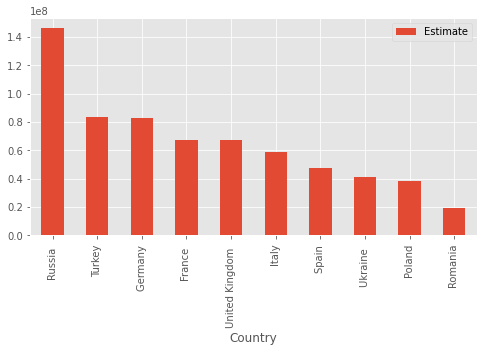

In [57]:
countries.set_index("Country").head(10).plot(kind = 'bar', figsize = (8, 4))